# Creación de un clasificador de machine learning para el envejecimiento de las CMH

## Predicción de accuracy

In [ ]:
# compare algorithms
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
# Loading classification dataset
xls3 = pd.ExcelFile("C:/Users/cdedi/Desktop/classification.xlsx")
classification = xls3.parse(index_col=None, na_values=['NA'])
classification.columns = classification.columns.str.replace(' ', '')
# Split-out dataset
X = classification.drop(['Status'],axis=1)
y = classification['Status']
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('NN-MLP', MLPClassifier(max_iter=300)))
# evaluate each model in turn
results_accuracy = []
names_accuracy = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results_accuracy.append(cv_results)
    names_accuracy.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms

pyplot.boxplot(results_accuracy, labels=names_accuracy)
pyplot.title('Algorithm Comparison Using Stratified K-Fold Cross-Validation')
pyplot.show()

## Predicción de AUC

LR: 0.525000 (0.361421)
LDA: 0.491667 (0.362189)
KNN: 0.416667 (0.278887)
CART: 0.383333 (0.140436)
NB: 0.441667 (0.345708)
SVM: 0.620833 (0.190440)
NN-MLP: 0.550000 (0.316667)


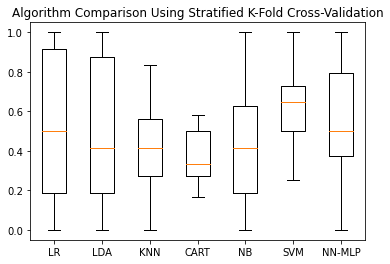

In [9]:
# compare algorithms
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
# Loading classification dataset
xls3 = pd.ExcelFile("C:/Users/cdedi/Desktop/classification.xlsx")
classification = xls3.parse(index_col=None, na_values=['NA'])
classification.columns = classification.columns.str.replace(' ', '')
# Split-out dataset
X = classification.drop(['Status'],axis=1)
y = classification['Status']
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('NN-MLP', MLPClassifier(max_iter=300)))
# evaluate each model in turn
results_accuracy = []
names_accuracy = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='roc_auc')
    results_accuracy.append(cv_results)
    names_accuracy.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms

pyplot.boxplot(results_accuracy, labels=names_accuracy)
pyplot.title('Algorithm Comparison Using Stratified K-Fold Cross-Validation')
pyplot.show()